In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import plotnine as gg
import umap
from bokeh.io import output_notebook
from bokeh.io import show as bshow
from bokeh.plotting import figure
from bokeh.models import Diamond
import bokeh
bokeh.sampledata.download()

Using data directory: /Users/habbasi/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import re


def load_images(fpath):
    image_data = []
    img_path = []
    
    for img in sorted(os.listdir(fpath)):
        
    
        imgpath = os.path.join(fpath, img)
        img = Image.open(imgpath)
        head, tail = os.path.split(imgpath)
        img_name = os.path.splitext(tail)[0]
    
        image_data.append(tail)
        img_path.append(head)
    
    ch1 = [s for s in image_data if "ch1" in s]
    ch2 = [s for s in image_data if "ch2" in s]
    ch3 = [s for s in image_data if "ch3" in s]
    ch4 = [s for s in image_data if "ch4" in s]
    ch5 = [s for s in image_data if "ch5" in s]
    ch6 = [s for s in image_data if "ch6" in s]



    
 ## extracting metadata from image file name and defining into groups

    pattern = re.compile("r(?P<row>\d+)c(?P<column>\d+)f(?P<field>\d+)p(?P<site>\d+)-ch(?P<channelnumber>\d+)")


 ## apply this regrex to all the imagelist

    match = [pattern.match(i) for i in ch1]
    row = [r.group("row") for r in match]
    col= [c.group("column") for c in match]
    field= [f.group("field") for f in match]
    site= [s.group("site") for s in match]
    channel= [ch.group("channelnumber") for ch in match]

# ## Defining Well names

    rc = [r+c for r, c in zip(row, col)]

    well_assignment= {'01' : "A",'02': "B",'03':"C",'04':"D",
                  '05': "E",'06':"F",'07':"G",'08':"H",
                  '09':"I",'10':"J",'11':"K",'12':"L",
                  '13':"M",'14':"N",'15':"O",'16':"P"
    }

    well = [well_assignment.get(i[0:2])+i[2:] for i in rc]

    zippedlist = list(zip(img_path, ch1, ch2, ch3, ch4, ch5, ch6, well, row, col, field, site, channel))



    df = pd.DataFrame(zippedlist, columns=['path', 'ch1', 'ch2', 'ch3','ch4','ch5','ch6',
                                       'Metadata_Well', 
                                        'Metadata_Row', 
                                        'Metadata_Col',
                                       'Metadata_Field',
                                       'Metadata_Site',
                                       'Metadata_channel'
                                      ])
    
    
    return df


fpath = "/Users/habbasi/Desktop/images"

df = load_images(fpath)


df.head()

,path,ch1,ch2,ch3,ch4,ch5,ch6,Metadata_Well,Metadata_Row,Metadata_Col,Metadata_Field,Metadata_Site,Metadata_channel
0,/Users/habbasi/Desktop/images,r16c20f06p01-ch1sk1fk1fl1.tiff,r16c20f06p01-ch2sk1fk1fl1.tiff,r16c20f06p01-ch3sk1fk1fl1.tiff,r16c20f06p01-ch4sk1fk1fl1.tiff,r16c20f06p01-ch5sk1fk1fl1.tiff,r16c20f06p01-ch6sk1fk1fl1.tiff,P20,16,20,06,01,1
1,/Users/habbasi/Desktop/images,r16c20f07p01-ch1sk1fk1fl1.tiff,r16c20f07p01-ch2sk1fk1fl1.tiff,r16c20f07p01-ch3sk1fk1fl1.tiff,r16c20f07p01-ch4sk1fk1fl1.tiff,r16c20f07p01-ch5sk1fk1fl1.tiff,r16c20f07p01-ch6sk1fk1fl1.tiff,P20,16,20,07,01,1
2,/Users/habbasi/Desktop/images,r16c20f08p01-ch1sk1fk1fl1.tiff,r16c20f08p01-ch2sk1fk1fl1.tiff,r16c20f08p01-ch3sk1fk1fl1.tiff,r16c20f08p01-ch4sk1fk1fl1.tiff,r16c20f08p01-ch5sk1fk1fl1.tiff,r16c20f08p01-ch6sk1fk1fl1.tiff,P20,16,20,08,01,1
3,/Users/habbasi/Desktop/images,r16c20f09p01-ch1sk1fk1fl1.tiff,r16c20f09p01-ch2sk1fk1fl1.tiff,r16c20f09p01-ch3sk1fk1fl1.tiff,r16c20f09p01-ch4sk1fk1fl1.tiff,r16c20f09p01-ch5sk1fk1fl1.tiff,r16c20f09p01-ch6sk1fk1fl1.tiff,P20,16,20,09,01,1
4,/Users/habbasi/Desktop/images,r16c21f01p01-ch1sk1fk1fl1.tiff,r16c21f01p01-ch2sk1fk1fl1.tiff,r16c21f01p01-ch3sk1fk1fl1.tiff,r16c21f01p01-ch4sk1fk1fl1.tiff,r16c21f01p01-ch5sk1fk1fl1.tiff,r16c21f01p01-ch6sk1fk1fl1.tiff,P21,16,21,01,01,1


In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import re
import skimage.io


def load_images(fpath):
    image_data = []
    img_path = []
    
    for img in sorted(os.listdir(fpath)):
        
    
        imgpath = os.path.join(fpath, img)
        img = Image.open(imgpath)
        head, tail = os.path.split(imgpath)
        img_name = os.path.splitext(tail)[0]
    
        image_data.append(tail)
        img_path.append(head)


    
 ## extracting metadata from image file name and defining into groups

    pattern = re.compile("r(?P<row>\d+)c(?P<column>\d+)f(?P<field>\d+)p(?P<site>\d+)-ch(?P<channelnumber>\d+)")


 ## apply this regrex to all the imagelist

    match = [pattern.match(i) for i in image_data]
    row = [r.group("row") for r in match]
    col= [c.group("column") for c in match]
    field= [f.group("field") for f in match]
    site= [s.group("site") for s in match]
    channel= [ch.group("channelnumber") for ch in match]

# ## Defining Well names

    rc = [r+c for r, c in zip(row, col)]

    well_assignment= {'01' : "A",'02': "B",'03':"C",'04':"D",
                  '05': "E",'06':"F",'07':"G",'08':"H",
                  '09':"I",'10':"J",'11':"K",'12':"L",
                  '13':"M",'14':"N",'15':"O",'16':"P"
    }

    well = [well_assignment.get(i[0:2])+i[2:] for i in rc]

    zippedlist = list(zip(img_path,image_data, well, row, col, field, site, channel))



    df = pd.DataFrame(zippedlist, columns=['path', "filename", 
                                       'Metadata_Well', 
                                        'Metadata_Row', 
                                        'Metadata_Col',
                                       'Metadata_Field',
                                       'Metadata_Site',
                                       'Metadata_channel'
                                      ])
    
    
    return df


fpath = "/Users/habbasi/Desktop/images"

df = load_images(fpath)


df.Metadata_channel.unique()

array(['1', '2', '3', '4', '5', '6'], dtype=object)

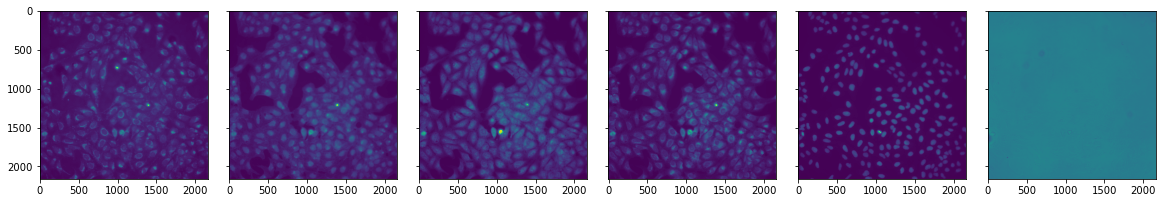

In [5]:
import matplotlib.image as mpimg
import glob

well = "P20"
field ="06"
ch = str(1)

#img = df.query("Metadata_Well in @ well and Metadata_Field in @ field and Metadata_channel in @ ch")
img = sorted(df.query("Metadata_Well in @ well and Metadata_Field in @ field")["filename"].tolist())


input_dir = "/Users/habbasi/Desktop/images"


image_data = []
for i, each in enumerate(img):
    fullpath = os.path.join(input_dir, each)
    imgs = skimage.io.imread(fullpath)
    image_data.append(imgs)

    
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 6),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_data):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()












In [6]:
path = os.getcwd()

foldername = "BR00100032"
data_file = foldername + "_selected_wells.csv"
df = pd.read_csv(Path("../" + foldername + "/" + data_file))

df.head()

,TableNumber,ImageNumber,ObjectNumber,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,...,Width_IllumDNA,Width_IllumER,Width_IllumMito,Width_IllumRNA,Width_OrigAGP,Width_OrigBrightfield,Width_OrigDNA,Width_OrigER,Width_OrigMito,Width_OrigRNA
0,42492787882573904418759932671851417937,100,1,6690,867.0,42.0,1.140277,0.691766,1,0.604336,...,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
1,42492787882573904418759932671851417937,100,2,4665,704.0,30.0,1.085347,0.629252,1,0.711128,...,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
2,42492787882573904418759932671851417937,100,3,5242,1694.0,23.0,1.374228,0.781731,1,0.509823,...,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
3,42492787882573904418759932671851417937,100,4,2061,1774.0,35.0,1.174983,0.798655,1,0.563577,...,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
4,42492787882573904418759932671851417937,100,5,2275,1668.0,61.0,1.111575,0.697623,1,0.594305,...,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


In [137]:
df.loc[:, 
       ["Nuclei_Location_Center_X", "Nuclei_Location_Center_Y",
        "PathName_OrigDNA", "Metadata_Well", "Metadata_Site", 
        "FileName_OrigDNA", "PathName_NucleiOutlines", 
        "FileName_NucleiOutlines", "Cells_Location_Center_X", 
        "Cells_Location_Center_Y"]].head(100)




,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,PathName_OrigDNA,Metadata_Well,Metadata_Site,FileName_OrigDNA,PathName_NucleiOutlines,FileName_NucleiOutlines,Cells_Location_Center_X,Cells_Location_Center_Y
0,863.913991,27.078082,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,A12,1,r01c12f01p01-ch5sk1fk1fl1.tiff,/home/ubuntu/local_output/BR00100032-A12-1/out...,A12_s1--nuclei_outlines.png,867.401644,41.605381
1,713.406982,28.742819,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,A12,1,r01c12f01p01-ch5sk1fk1fl1.tiff,/home/ubuntu/local_output/BR00100032-A12-1/out...,A12_s1--nuclei_outlines.png,709.509968,33.139121
2,1683.222917,24.622222,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,A12,1,r01c12f01p01-ch5sk1fk1fl1.tiff,/home/ubuntu/local_output/BR00100032-A12-1/out...,A12_s1--nuclei_outlines.png,1706.391644,43.937238
3,1795.810179,42.269601,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,A12,1,r01c12f01p01-ch5sk1fk1fl1.tiff,/home/ubuntu/local_output/BR00100032-A12-1/out...,A12_s1--nuclei_outlines.png,1778.420184,36.942261
4,1672.429848,61.785076,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,A12,1,r01c12f01p01-ch5sk1fk1fl1.tiff,/home/ubuntu/local_output/BR00100032-A12-1/out...,A12_s1--nuclei_outlines.png,1672.104176,63.709451
...,...,...,...,...,...,...,...,...,...,...
95,1773.588850,365.994338,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,A12,1,r01c12f01p01-ch5sk1fk1fl1.tiff,/home/ubuntu/local_output/BR00100032-A12-1/out...,A12_s1--nuclei_outlines.png,1770.479372,382.353414
96,1880.812084,368.094214,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,A12,1,r01c12f01p01-ch5sk1fk1fl1.tiff,/home/ubuntu/local_output/BR00100032-A12-1/out...,A12_s1--nuclei_outlines.png,1880.209749,368.664067
97,1458.858346,383.596103,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,A12,1,r01c12f01p01-ch5sk1fk1fl1.tiff,/home/ubuntu/local_output/BR00100032-A12-1/out...,A12_s1--nuclei_outlines.png,1459.617208,400.272001
98,1948.441328,383.727443,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,A12,1,r01c12f01p01-ch5sk1fk1fl1.tiff,/home/ubuntu/local_output/BR00100032-A12-1/out...,A12_s1--nuclei_outlines.png,1969.720750,392.047141


'/home/ubuntu/bucket/projects/2018_11_20_GeneCpdFollowup/2018_11_20_Batch1/images/BR00100032__2018-11-20T09_38_24-Measurement2/Images'

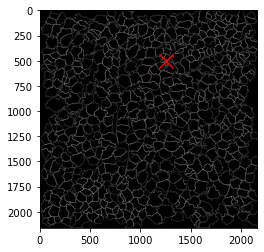

In [140]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

input_dir = "/Users/habbasi/Desktop/outlines"

imaglist = [os.path.join(input_dir, img) for img in os.listdir(input_dir)]
tmp = imaglist[0]

nuclei_X = 1250
nuclei_Y = 500

img=mpimg.imread(tmp)
plt.imshow(img,  cmap='gray')

pts = np.array([1250, 500])

# plt.plot(863.913991, 27.078082, "og", markersize=2)  # og:shorthand for green circle
plt.scatter(pts[0], pts[1], marker="x", color="red", s=200)
plt.show()


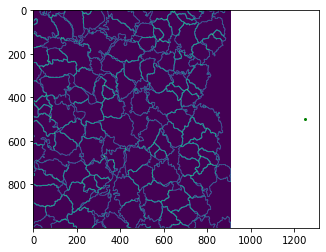

In [150]:

# def bounding_box(x, y):
#     top_left = (x -2.0, y-4.5)
#     bottom_right = (x + 2.0, y+4.5)

    
#     return top_left, bottom_right
    
# x, y = bounding_box(nuclei_X, nuclei_Y)

# print(x, y)




x = 1250

w = x * 2
y = 500
h = y * 2


crop_img = img[y:y+h, x:x+w]
plt.imshow(crop_img)
plt.plot(1250, 500, "og", markersize=2) 
plt.show()

In [131]:

img = cv2.imread(tmp)
h, w = img.shape[0],img.shape[1]

img_scaled = cv2.resize(img, (w//5, h//5))

crop_img = img[y:y+h, x:x+w]

cv2.imshow("cropped", crop_img)



# plt.figure()
# plt.subplot(121)
# plt.title('Original_image')
# plt.imshow(img_1_orig)
# plt.subplot(122)
# plt.title('Resized Image')
# plt.imshow(img_1_scaled)
# plt.show()

TypeError: can only concatenate tuple (not "int") to tuple

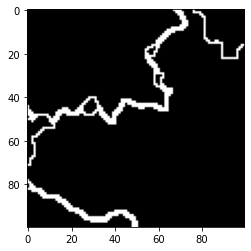

In [130]:
from PIL import Image
img = Image.open(tmp,)
area = (500, 400, 300, 500)
cropped_img = img.crop(area)

plt.imshow(cropped_img, cmap='gray')
# cropped_img.save("cropped.jpg")

In [108]:
#img = cv2.rectangle(img,(670.104176,9.209451),(674.104176,68.209451),(255,0,0),3)

import imgaug as ia
import imgaug.augmenters as iaa

ModuleNotFoundError: No module named 'imgaug'

In [74]:

# Start coordinate, here (5, 5) 
# represents the top left corner of rectangle 
start_point = (861.914, 22.5781)
  
# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (865.914, 31.5781)
  
# Blue color in BGR 

  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
img = cv2.rectangle(img, start_point, end_point,thickness) 


# window_name = "bounding box"
# # Displaying the image  
# cv2.imshow(window_name, img)  

TypeError: function takes exactly 4 arguments (2 given)

In [ ]:
 x, y, w, h = cv2.boundingRect(c)